In [1]:
#Import Liblaries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn import linear_model
import tkinter as tk 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn import linear_model
import tkinter as tk 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
import seaborn as sns

# Data Exploration


In [2]:
#load csv
df = pd.read_csv('AVERAGE TEMPERATURE.csv', parse_dates=['PERIOD'])
df

,PERIOD,AverageTemperature
0,1853-01-01,24.219
1,1853-02-01,23.765
2,1853-03-01,25.812
3,1853-04-01,26.842
4,1853-05-01,27.647
...,...,...
1915,2012-08-01,27.586
1916,2012-09-01,27.328
1917,2012-10-01,26.862
1918,2012-11-01,27.144


In [3]:
#Print data types of dataframe columns
print ('\n Data Types:')
df.dtypes


 Data Types:


PERIOD                datetime64[ns]
AverageTemperature           float64
dtype: object

In [5]:
#Show the number of rows and columns.
df.shape

(1920, 2)

In [6]:
#Show all the column labels of the dataframe.
df.columns

Index(['PERIOD', 'AverageTemperature'], dtype='object')

# Data processing

#### The AVERAGE TEMPERATURE.csv set contains inaacurate date values and null values. Before creating a model, the data will be preproccesses and cleaned in order to achive better results/ metrics 

In [7]:
#Check if there are Nan values
df.isna().sum()

PERIOD                 0
AverageTemperature    38
dtype: int64

In [8]:
#remove rows and columns with Null/NaN
df = df.dropna()
#Check again for null values
df.isnull().sum()

PERIOD                0
AverageTemperature    0
dtype: int64

In [9]:
#Separete month and year from PERIOD field to create a condition
df['PERIOD'] = pd.to_datetime(df['PERIOD'])
df['Year'], df['Month'] = df['PERIOD'].dt.year, df['PERIOD'].dt.month

#Create a condtion that all year greater than 2012 will be removed
invalidValues = df[df['Year'] > 2012 ].index
#Drop rows with invalid values
df.drop(invalidValues , inplace=True)
df

<ipython-input-9-127af7963eec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PERIOD'] = pd.to_datetime(df['PERIOD'])
<ipython-input-9-127af7963eec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'], df['Month'] = df['PERIOD'].dt.year, df['PERIOD'].dt.month
C:\Users\emman\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

,PERIOD,AverageTemperature,Year,Month
0,1853-01-01,24.219,1853,1
1,1853-02-01,23.765,1853,2
2,1853-03-01,25.812,1853,3
3,1853-04-01,26.842,1853,4
4,1853-05-01,27.647,1853,5
...,...,...,...,...
1915,2012-08-01,27.586,2012,8
1916,2012-09-01,27.328,2012,9
1917,2012-10-01,26.862,2012,10
1918,2012-11-01,27.144,2012,11


In [10]:
#Drop the unnecessary columns
df = df.drop(['Year', 'Month'], axis=1)
df

,PERIOD,AverageTemperature
0,1853-01-01,24.219
1,1853-02-01,23.765
2,1853-03-01,25.812
3,1853-04-01,26.842
4,1853-05-01,27.647
...,...,...
1915,2012-08-01,27.586
1916,2012-09-01,27.328
1917,2012-10-01,26.862
1918,2012-11-01,27.144


In [11]:
#Sort the Period column()
sortedDF = df.sort_values(by=['PERIOD'])
sortedDF

,PERIOD,AverageTemperature
0,1853-01-01,24.219
1,1853-02-01,23.765
2,1853-03-01,25.812
3,1853-04-01,26.842
4,1853-05-01,27.647
...,...,...
1917,2012-10-01,26.862
718,2012-11-01,25.845
1918,2012-11-01,27.144
719,2012-12-01,25.177


In [12]:
#set the PERIOD column as the dataframe index
df = sortedDF.set_index('PERIOD')
df

,AverageTemperature
PERIOD,
1853-01-01,24.219
1853-02-01,23.765
1853-03-01,25.812
1853-04-01,26.842
1853-05-01,27.647
...,...
2012-10-01,26.862
2012-11-01,25.845
2012-11-01,27.144


In [13]:
#split sortedDF into 80-20 split
train, test = train_test_split(sortedDF, test_size=0.2)
#set PERIOD as index
train = train.set_index('PERIOD')
test = test.set_index('PERIOD')

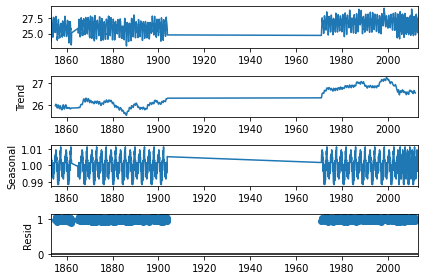

In [233]:
#Decompostion
resultss = seasonal_decompose(df, model='multiplicative', period = 50)
resultss.plot()
pyplot.show()

# Arima Model

In [14]:
#Check if data is stationary based on the P-value,P-value should be less than 0.5 to be stationary 
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['AverageTemperature'])

1. ADF :  -1.8094206233887948
2. P-Value :  0.3757947477441947
3. Num Of Lags :  23
4. Num Of Observations Used For ADF Regression: 1162
5. Critical Values :
	 1% :  -3.4359901072390353
	 5% :  -2.86403051064684
	 10% :  -2.5680960046332366


In [194]:
import statsmodels.api as sm

print("Model summary is")
mod = sm.tsa.statespace.SARIMAX(df['AverageTemperature'],
                               order =(2,0,3),
                               param_seasonal = (2,1,1,12),
                               enforce_stationarity = False,
                               enforce_invertibility = False)
result = mod.fit()
print(result.summary().tables[1])

Model summary is


C:\Users\emman\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\emman\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8632      0.026     71.358      0.000       1.812       1.914
ar.L2         -0.8632      0.026    -33.061      0.000      -0.914      -0.812
ma.L1         -0.9185      0.026    -35.190      0.000      -0.970      -0.867
ma.L2          0.1698      0.024      7.012      0.000       0.122       0.217
ma.L3         -0.2525      0.023    -11.014      0.000      -0.297      -0.208
sigma2         0.4081      0.016     25.456      0.000       0.377       0.440


C:\Users\emman\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [236]:
#Predict Average Temperature starting from the last row(row 1186) of sortDF dataframe.
pred_uc = result.get_forecast(steps=150) #Steps = number of rows that will be predicted
pred_ci = pred_uc.predicted_mean
pred_ci = pd.DataFrame(data=pred_ci)
print(pred_ci.shape)
pred_ci.head()

(150, 1)


C:\Users\emman\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,predicted_mean
1186,26.299259
1187,26.652049
1188,26.675502
1189,26.695839
1190,26.713488


In [237]:
#Based on the original dataset, next rows = next month.
#We will create future date for every month
#Then we the created predicted_Temperature will be combine with the future dates

import datetime
#Craete future dates

# The size of each step in days
day_delta = datetime.timedelta(days=31) #By months

pred_ci['Futuredate'] = ''
ftMonths = pred_ci['Futuredate']

start_date = sortedDF['PERIOD'].max()
end_date = start_date + 1*day_delta

for i in range(150):
    #Create future (i)months starting from date sortedDF['PERIOD'].max()
    ftMonths.iloc[i] = (start_date + i*day_delta)

C:\Users\emman\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [238]:
#Transfer the content of future dates to temporary dataframe
tempFuturedf = pd.DataFrame(data=ftMonths)

#Combine the created future dates with the created predicted temperature

pred_ci['Futuredate'] = tempFuturedf['Futuredate']

#Convert string Date time into Python Date time object
pred_ci['Futuredate']= pd.to_datetime(pred_ci['Futuredate'])

#Set Futuredate as an index
pred_ci = pred_ci.set_index('Futuredate')


#### Based on the original dataset, next rows = next month.
#### Therefore since the  Predicted temperature starts from the last row of the dataframe,  then we can assume that the next row date is next month.

#### Then the created Futuredate by months will be combine with the predicted_AverageTemperature

In [239]:
#Rename the predicted_mean column into predicted_AverageTemperature
pred_ci.rename(columns = {'predicted_mean':'predicted_AverageTemperature'}, inplace = True)
#Print the Predicted data
pred_ci.tail()


,predicted_AverageTemperature
Futuredate,
2025-03-23,26.916586
2025-04-23,26.917268
2025-05-24,26.917951
2025-06-24,26.918633
2025-07-25,26.919315


Text(0, 0.5, 'predicted_AverageTemperature')

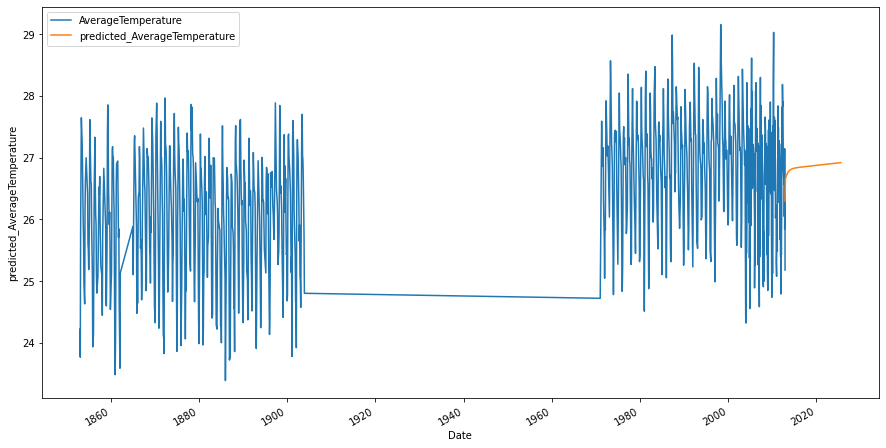

In [240]:
#Plot the Actual/original data with predicted data
plt.figure(figsize=(15,8))

train, test = train_test_split(sortedDF, test_size=0.2)
train = train.set_index('PERIOD')
test = test.set_index('PERIOD')
train['AverageTemperature'].plot(legend=True) #or test['AverageTemperature'].plot(legend=True)
pred_ci['predicted_AverageTemperature'].plot(legend=True)
plt.xlabel('Date')
plt.ylabel('predicted_AverageTemperature')

In [235]:
## tkinter GUI
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 500, height = 300)
canvas1.pack()




# New_Interest_Rate label and input box
labelTitle = tk.Label(root, text='Prediction using Arima', font=('Helvetica', 11, 'bold'))
canvas1.create_window(250, 20, window=labelTitle)

# New_Interest_Rate label and input box
label0 = tk.Label(root, text='Starting year is 2012. input should be > 2012')
canvas1.create_window(185, 70, window=label0)


# New_Interest_Rate label and input box
label1 = tk.Label(root, text='Type year: ')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

def values(): 
    global New_Interest_Rate #our 1st input variable
    New_Interest_Rate = int(entry1.get()) 
    
    userInput = New_Interest_Rate - 2012
    # New_Interest_Rate - 2012 = Number of future years starting from 2012
    
    from datetime import datetime


    pred_uc = result.get_forecast(steps=userInput*12) #userInput*12; userInput is the number of years and
                                                      # 12 is the number of months in 1 year
    
    pred_ci = pred_uc.predicted_mean
    pred_ci = pd.DataFrame(data=pred_ci)


    #Create future dates
    import datetime
    # The size of each step in days
    day_delta = datetime.timedelta(days=31)#By months

    pred_ci['Futuredate'] = ''
    fdate = pred_ci['Futuredate']

    start_date = sortedDF['PERIOD'].max() #starting  date which is 2012
    end_date = start_date + 1*day_delta #End  date

    for i in range(userInput*12):
        #Create future (i)months starting from "start_date" and end with the specified year of the user
        fdate.iloc[i] = (start_date + i*day_delta)
        
        
    #Combine the created future dates with the created predicted temperature
    tempFdateDf = pd.DataFrame(data=fdate)
    pred_ci['Futuredate'] = tempFdateDf['Futuredate']

    pred_ci['Futuredate']= pd.to_datetime(pred_ci['Futuredate'])
    pred_ci['Year'] = pred_ci['Futuredate'].dt.year

    
    #get the future temperature value based on the year inputed by the user
    tkResult = pred_ci.loc[pred_ci['Year'] == New_Interest_Rate]
    
    label_Prediction = tk.Label(root, text=  tkResult['predicted_mean'].tail(1), bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)

button1 = tk.Button (root, text='Predict Temperature',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 150, window=button1)
 

root.mainloop()